SNU / Intro to Robotics 

#GridWorld Example PI/VI # 

> Importing Modules



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

> Making Environments

In [ ]:
# We are going to make 4 by 4 Grid World where agent starts moving at 0,0 and needs to arrive 3,3
# Each step, agent could go to 4 direction near to its block.
# There are termination hole at 2,1 where agent immediately recives -100 reward and terminates.
# Also, Collision with walls are -5, Goal zone gives +100 rewards
# Going to the goal or termination hole, agent terminates.

goal_pos = (3, 3)  # position of the goal
trap_pos = (2, 1) # position where trap exists 

value_PI = np.zeros((4,4)) #matrix where value function of each states are saved while using VI
value_VI = np.zeros((4,4)) #matrix where value function of each states are saved while using VI
value_PI_sto = np.zeros((4,4)) #matrix where value function of each states are saved while using PI under stochastic model
Rewards = np.zeros((4,4))
Rewards[goal_pos] = 100 
Rewards[trap_pos] = -100 # Rewards matrix is matrix with rewards given when arrived at such state. 
directions = ['Left','Up','Right','Down', 'Stay'] # Possible actions agent could choose (stay only when termination occur)
state = np.array([0,0]) 
action = {'Up' : np.array([-1,0]), 'Down':np.array([1,0]), 'Right':np.array([0,1]), 'Left' : np.array([0,-1]), 'Stay' : np.array([0,0]) } #possible actions 
policy_PI = [['Right','Up','Left','Down'],['Right','Up','Left','Down'],['Right','Stay','Left','Down'],['Right','Up','Left','Stay']] # Random Initial Policy
policy_PI_sto = [['Right','Up','Left','Down'],['Right','Up','Left','Down'],['Right','Stay','Left','Down'],['Right','Up','Left','Stay']]
#you can call values / Rewards using command : value[tuple(state)]

#parameters for training PI 
gamma = 0.9
num_improve = 10
num_eval_per_improve = 30

#parameters for training VI
gamma = gamma
num_value_iteration = 1000

def update_state(state, direction):
  #Returns Updated state, considering collision with walls / Return new state & whether collision had occured
  if np.array_equal(state, goal_pos) or np.array_equal(state, trap_pos):
    return state, False
  else:
    state_prime = state + action[direction]
    if(0<=state_prime[0]<4) and (0<=state_prime[1]<4):
      return state_prime , False
    else: 
      return state, True


Function Visualizing Policy

In [ ]:
#Function to plot policy with arrows (directions)
def plot_arrows(policy):
    fig, ax = plt.subplots(4, 4)
    for i in range(4):
        for j in range(4):
            if policy[i][j] == 'Up':
                ax[i, j].arrow(0, 0, 0, 0.5, head_width=0.2, head_length=0.2, fc='k', ec='k')
            elif policy[i][j] == 'Down':
                 ax[i, j].arrow(0, 0, 0, -0.5, head_width=0.2, head_length=0.2, fc='k', ec='k')
            elif policy[i][j] == 'Left':
                ax[i, j].arrow(0, 0, -0.5, 0, head_width=0.2, head_length=0.2, fc='k', ec='k')
            elif policy[i][j] == 'Right':
                ax[i, j].arrow(0, 0, 0.5, 0, head_width=0.2, head_length=0.2, fc='k', ec='k')

            ax[i, j].set_xlim([-1, 1])
            ax[i, j].set_ylim([-1, 1])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])

    plt.show()


> Policy Evaluation

In [ ]:
#update the value function using current policy
def policy_eval(policy, value):
  '''
  At this section, you need to return updated value_function matrix new_value
  which new_value(i,j) consists updated value function from current value & policy
  
  Hint : use equation
  new_value[i,j] = Rewards[tuple(s_prime)] + gamma*value[tuple(s_prime)]

  You should know this isn't enough since you need extra reward (-5) when collision has occured
  '''
  new_value = np.zeros((4,4))
  #TODO
  return new_value


> Policy Improvement

In [ ]:
# Select Action (Directions) Maximizing value function of each state
def policy_improve(value):
  '''
  At this section, you need to return policy, which is list of list of action for each state which 
  maximizes value function. 
  There is skeleton code below of terminal state. Try finishing the code below.

  Hint : to select optimal action try using loop of
  for direction in directions: 
  to visit all possible directions
  '''
  new_policy = [[None, None, None, None],[None, None, None, None],[None, None, None, None],[None, None, None, None]]
  for i in range(4):
    for j in range(4):
      if((i,j)==trap_pos) or ((i,j)==goal_pos):
        new_policy[i][j] = 'Stay' #terminate
      else: 
        #TODO

  return new_policy


Policy Iteration 

total iterations: 300
[['Down', 'Down', 'Right', 'Down'], ['Right', 'Right', 'Right', 'Down'], ['Up', 'Stay', 'Right', 'Down'], ['Down', 'Right', 'Right', 'Stay']]


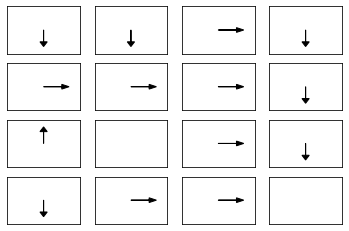

[[ -45.   -50.   -45.    81. ]
 [ -40.5  -45.   -40.5   90. ]
 [-100.     0.  -100.   100. ]
 [ -90.  -100.   -90.     0. ]]


In [ ]:
for i in range(num_improve):
  for j in range(num_eval_per_improve):
    new_value_PI = policy_eval(policy_PI, value_PI)
    value_PI = new_value_PI
policy_PI = policy_improve(value_PI)
print('total iterations:', num_improve*num_eval_per_improve)
print(policy_PI)
plot_arrows(policy_PI)
print(value_PI)

  
 

Value Iteration

In [ ]:
# proceed one step of value iteration to update value function, and also return corresponding policy (action choosed to update value function)
def update_value(value):
  '''
  At this section, you need to return new_value which is result of one step of VI , and also the direction opt_policy that 
  was choosed to earn such new_value. This may be similar to the code used at policy eval + policy improvement
  Try finishing the code!
  '''
  new_value = np.zeros((4,4))
  opt_policy = [[None,None,None,None],[None,None,None,None],[None,None,None,None],[None,None,None,None]]
  for i in range(4):
    for j in range(4):
      if((i,j)==trap_pos) or ((i,j)==goal_pos):
        opt_policy[i][j] = 'Stay' #terminate
        new_value[i,j] = #TODO
      else:
        #TODO
            
  return new_value, opt_policy

total iterations: 1000
[['Down', 'Down', 'Down', 'Down'], ['Down', 'Right', 'Down', 'Down'], ['Down', 'Stay', 'Down', 'Down'], ['Right', 'Right', 'Right', 'Stay']]


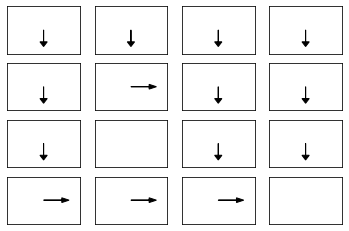

[[ 59.049  65.61   72.9    81.   ]
 [ 65.61   72.9    81.     90.   ]
 [ 72.9     0.     90.    100.   ]
 [ 81.     90.    100.      0.   ]]


In [ ]:
#Select action maximizing bellman optimal equation.
for i in range(num_value_iteration): 
  new_value_VI , policy_VI = update_value(value_VI)
  value_VI = new_value_VI

print('total iterations:', num_value_iteration)
print(policy_VI)
plot_arrows(policy_VI)
print(value_VI)

Comparing rate of convergence between PI and VI

Good! Now you succeed at implemeting PI/VI under deterministic model Situation. Now, look back at question 2 of handout print and consider stochastic model situation, which has 5% of noise distribution of going toward random directions. So, 85% of following command & 5%s of noise toward each random directions.

In [ ]:
#In here you need to make a state update model with stochastic probabilities, of 0.85/0.05/0.05/0.05.
#We are not actually gonna use this model for our policy evaluation / improvement fuction since we know the model. (Model-Based Algorithm)
import random

def update_state_stochastic(state, direction):
  #Returns Updated state, considering collision with walls / Return new state & whether collision had occured
  '''
  Now you need to make a model which returns next state and if collision has occured.
  But, Now this model is having noise! Try making this model and reference from update_state!!

  Hint : random.choice(directions[:,-1]) : randomly choose from Up/Left/Right/Down with same probabilities 
  '''
  #TODO
  

Now, try updating policy gradient algorithm considering 

In [ ]:
#update the value function using current policy
def policy_eval_stochastic(policy, value):
  '''
  Try evaluating policy! You can see I used update_state not update_state_stochastic
  below. We should manually calculate value function of current policy with considering all 
  situations! (0.85 of desired direction & 0.05 of 3 noises)
  '''
  new_value = np.zeros((4,4))
  for i in range(4):
    for j in range(4):
      s_prime , collision = update_state(np.array([i,j]), policy[i][j])
      if (i,j) == trap_pos or (i,j)==goal_pos :
        new_value[i,j] = 0
      else:  
        #TODO
  return new_value

# Select Action (Directions) Maximizing value function of each state
def policy_improve_stochastic(value):
  '''
  Try to find optimal action!!
  '''
  new_policy = [[None, None, None, None],[None, None, None, None],[None, None, None, None],[None, None, None, None]]
  for i in range(4):
    for j in range(4):
      if((i,j)==trap_pos) or ((i,j)==goal_pos):
        new_policy[i][j] = 'Stay' #terminate
      else:
        #TODO
  return new_policy

Now execute policy iteration

total iterations: 300
[['Right', 'Right', 'Right', 'Down'], ['Right', 'Right', 'Right', 'Down'], ['Down', 'Stay', 'Right', 'Down'], ['Right', 'Right', 'Right', 'Stay']]


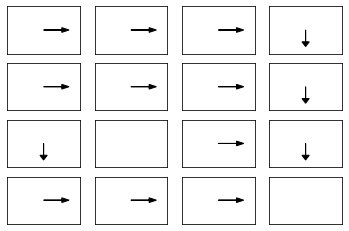

[[49.09765351 56.18855706 64.31912324 73.02814087]
 [48.76930104 55.47885124 72.88333023 83.740193  ]
 [48.31037516  0.         76.24830519 96.28218054]
 [64.30299311 74.30295013 95.83749371  0.        ]]


In [ ]:
for i in range(num_improve):
  for j in range(num_eval_per_improve):
    new_value_PI = policy_eval_stochastic(policy_PI_sto, value_PI_sto)
    value_PI_sto = new_value_PI
  policy_PI_sto = policy_improve_stochastic(value_PI_sto)
print('total iterations:', num_improve*num_eval_per_improve)
print(policy_PI_sto)
plot_arrows(policy_PI_sto)
print(value_PI_sto)

Visuallize your policy iteration under deterministic / stochastic model!

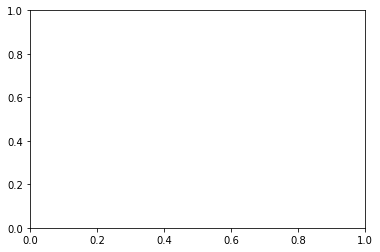

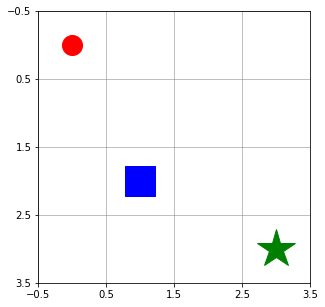

In [ ]:
robot_pos = np.array((0, 0))  # starting position of the robot

fig, ax = plt.subplots()
policy = policy_PI_sto # choose from policy_PI, policy_VI, policy_PI_sto
model = update_state_stochastic # choose from update_state & update_state_stochastic

def animate(i):
    global robot_pos
    if i == 0:
        robot_pos = np.array((0, 0))  # starting position of the robot
    ax.clear()
    plt.cla()
    plt.xlim(-0.5, 3.5)
    plt.ylim( 3.5, - 0.5)
    plt.xticks([-0.5, 0.5, 1.5, 2.5, 3.5])
    plt.yticks([-0.5, 0.5, 1.5, 2.5, 3.5])
    plt.gca().set_aspect('equal', adjustable='box')  
    plt.plot(robot_pos[1], robot_pos[0], 'ro', markersize=20)
    plt.plot(goal_pos[1], goal_pos[0], 'g*', markersize=40)
    plt.plot(trap_pos[1], trap_pos[0], 'bs', markersize=30)
    
    robot_pos, c= model(robot_pos, policy[robot_pos[0]][robot_pos[1]])

    plt.grid(True, linewidth=0.5, color='gray')

#Create the animation
fig = plt.figure(figsize=(5, 5))
anim = FuncAnimation(fig, animate, frames=range(7), interval=100)
HTML(anim.to_jshtml())